In [14]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


IMPORTING THE DATASET

In [15]:
dataset = pd.read_csv('Ads_CTR_Optimisation.csv')

IMPLEMENTING THE UCB

In [16]:
import math
N = 10000
d = 10
ads_selected = []
numbers_of_selection = [0]*d
sums_of_rewards = [0]*d
total_reward = 0

for n in range(N):
    ad = 0 
    max_upper_bound = 0
    for i in range(d):
        if numbers_of_selection[i] > 0 :
            average_reward = sums_of_rewards[i] / numbers_of_selection[i]
            delta_i = math.sqrt((3/2)*(math.log(n+1)/numbers_of_selection[i]))
            upper_bound = average_reward+delta_i
        else:
            upper_bound = 1e400
            if upper_bound > max_upper_bound:
                max_upper_bound = upper_bound
                ad= i
    ads_selected.append(ad)
    numbers_of_selection[ad]+=1
    reward = dataset.values[n,ad]
    sums_of_rewards[ad]  += 1 +reward
    
    total_reward = total_reward+reward
                   

<function matplotlib.pyplot.show(close=None, block=None)>

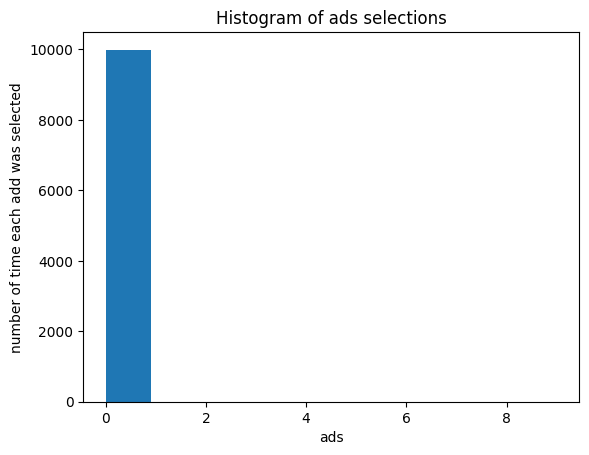

In [17]:
plt.hist(ads_selected)
plt.title("Histogram of ads selections")
plt.xlabel('ads')
plt.ylabel('number of time each add was selected')
plt.show